# Linear Regression

## Linear Regression with Single Variable
Simple
linear regression can be used to model a linear relationship between one response
variable and one explanatory variable

In [2]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
X = np.array([[6], [8], [10], [14], [18]])
y =np.array([[7], [9], [13], [17.5], [18]])
df = pd.DataFrame(np.vstack((X.reshape(1,5),y.reshape(1,5))).T, columns=['Diamter (inch)', 'Price in $' ])
print df

   Diamter (inch)  Price in $
0             6.0         7.0
1             8.0         9.0
2            10.0        13.0
3            14.0        17.5
4            18.0        18.0


In [4]:
plt.figure()

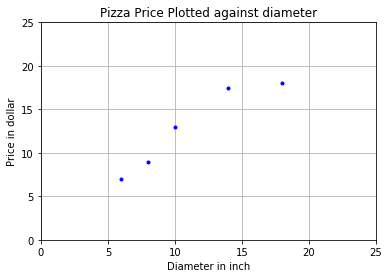

In [5]:
plt.title('Pizza Price Plotted against diameter')
plt.xlabel('Diameter in inch')
plt.ylabel('Price in dollar')
plt.plot(X, y, 'b.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

A 12" inch pizza will cost: $13.68


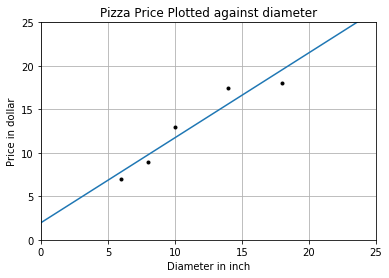

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print 'A 12" inch pizza will cost: $%.2f' % model.predict([[12]])[0]
end_point = [[0],[25]]
prediction = [ model.predict([i])[0] for i in end_point]
plt.title('Pizza Price Plotted against diameter')
plt.xlabel('Diameter in inch')
plt.ylabel('Price in dollar')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot(end_point, prediction)
plt.plot(X, y, 'k.')
plt.show()

The `sklearn.linear_model.LinearRegression` class is an estimator. Estimators
predict a value based on the observed data. In scikit-learn, all estimators implement
the `fit()` and `predict()` methods. The former method is used to learn the parameters
of a model, and the latter method is used to predict the value of a response variable
for an explanatory variable using the learned parameters

### Evaluation using statistical methods

![image](https://www.s-cool.co.uk/assets/learn_its/alevel/maths/bivariate-data/regression/2007-11-16_140848.gif)

A **cost function**, also called a loss function, is used to define and measure the error of a model. 
The differences between the prices predicted by the model and the observed prices of the pizzas in the training set are called residuals or training errors.

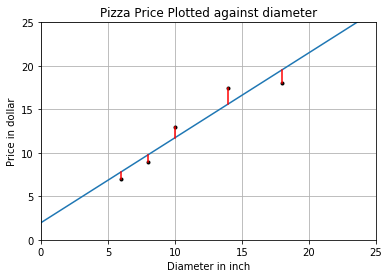

In [7]:
end_point = [[0],[25]]
prediction = [ model.predict([i])[0] for i in end_point]
plt.title('Pizza Price Plotted against diameter')
plt.xlabel('Diameter in inch')
plt.ylabel('Price in dollar')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot(end_point, prediction)
plt.plot(X, y, 'k.')
y_new = [ model.predict([i])[0] for i in X ]
for i in range(len(X)):
    plt.plot([X[i],X[i]], [y[i],model.predict([X[i]])[0]], 'r-')
plt.show()

We can produce the best pizza-price predictor by **minimizing the sum of the residuals**.
That is, our model fits if the values it predicts for the response variable are close to the observed values for all of the training examples. This measure of the model's fitness is called the *residual sum of squares cost function.*

![sum of residuals squared](https://wikimedia.org/api/rest_v1/media/math/render/svg/2f6526aa487b4dc460792bf1eeee79b2bba77709)

In [8]:
import numpy as np
print "residual sum of sqaures: %.2f" % np.sum((model.predict(X)-y)**2) 

residual sum of sqaures: 8.75


By the solution of general/simple linear regression 
![equation of linear line](https://wikimedia.org/api/rest_v1/media/math/render/svg/bf2c1cac7c1e6c9a426d92e9adad6ff4d8b4152e)
We know
![solution picture](https://wikimedia.org/api/rest_v1/media/math/render/svg/ac3b42d4d7b7d8d496bbca97266021f73cceac84)

In [9]:
#mean and variance
mean_x = np.mean(X)
mean_y = np.mean(y)
variance = np.var(X, ddof=1) #ddof param is used to set Bessel's 
                            #correction
print "variance: %.1f and mean_x: %.1f mean_y: %.1f" % (variance, mean_x, mean_y)

variance: 23.2 and mean_x: 11.2 mean_y: 12.9


In [10]:
#for evaluating covariance
X_1d = X.reshape(1,5)
y_1d = y.reshape(1,5)
covariance_x_y = np.cov(X_1d[0],y_1d[0])[0][1]
print "Covariance: %.2f" %covariance_x_y

Covariance: 22.65


In [11]:
beta = covariance_x_y/variance
alpha = mean_y - beta*(mean_x)
print 'alpha: %.1f and beta: %.1f'%(alpha, beta) 

alpha: 2.0 and beta: 1.0


### Bias V/s Variance
It can be helpful to visualize bias and variance as darts thrown at a
dartboard. Each dart is analogous to a prediction from a different dataset. A model
with high bias but low variance will throw darts that are far from the bull's eye, but
tightly clustered. A model with high bias and high variance will throw darts all over
the board; the darts are far from the bull's eye and each other.
A model with low bias and high variance will throw darts that are closer to the
bull's eye, but poorly clustered. Finally, a model with low bias and low variance
will throw darts that are tightly clustered around the bull's eye

### R-Squared Error testing
R-squared(aka coefficient of determination) measures how well
the observed values of the response variables are predicted by the model. More concretely, r-squared is the proportion of the variance in the response variable that is explained by the model. An r-squared score of one indicates that the response variable can be predicted without any error using the model. An r-squared score of one half indicates that half of the variance in the response variable can be predicted using the model. There are several methods to calculate r-squared. In the case of simple linear regression, r-squared is equal to the square of the Pearson product moment correlation coefficient, or Pearson's r.
**R-squared testing is used in `model.score` method of scikit-learn.**

![R-squared](https://wikimedia.org/api/rest_v1/media/math/render/svg/fed29779d54adeccdec58f0894870c680f3d6b5b)
![R-squared explanation](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-82hzj5pekJZK-M4hjM9_PaHCuVAMho6M8kaKhutJcfYQ7vDw)

**_R<sup>2</sup> = 1-(unexplained variance/total variance)_**
so result closer to 1 is better since it implies out of total variation our model is able to explain/learn most of variation.

In [12]:
#in-built scikit testing
X_test = [[9], [5], [7], [15]]
y_test = [[10], [6], [10], [20]]
score = model.score(X_test, y_test)
print "The model's R**2 score is: %.1f" %score

The model's R**2 score is: 0.9


In [13]:
squarred_sum_residual = np.sum((y - model.predict(X))**2)
squarred_sum_total = np.sum((y - np.mean(y))**2)
print "R**2 value: %.1f" %(1-(squarred_sum_residual/squarred_sum_total))

R**2 value: 0.9


## Linear Regression in multiple variable
In real world problems it's very hard to get a single independent variable because real world entities depend on various different factors which should be taken into consideration always.
To solve this we can extend the single variable model into multiple variable by the help of matrices.

![Matrix representation](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQypE2wALrBG1ASynt5SpqDv5tRstuKF0LIq9u6xLO4XceNUKceYg)

Y<sub>5x1</sub> = X<sub>5x2</sub> * beta<sub>2x1</sub> + bias<sub>5x1</sub>

By the help of some linear algebra we can see that

![image of normal equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/46cf247a57b181c36165a0b6ae5ede6bdc1a24a3)

verify the dimensions yourself

In [14]:
df['Number of toppings'] = [2, 1, 0, 2, 0]

In [15]:
df

,Diamter (inch),Price in $,Number of toppings
0,6.0,7.0,2
1,8.0,9.0,1
2,10.0,13.0,0
3,14.0,17.5,2
4,18.0,18.0,0


In [16]:
model_2 = LinearRegression()
model_2.fit(df[[df.columns[0],df.columns[2]]],df[df.columns[1]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
df_test = pd.DataFrame({'Diameter (in inches)': np.array([8, 9, 11, 16,12]),
                       'Number of toppings': np.array([2, 0, 2, 2, 0]),
                       'Price (in dollars)': np.array([11, 8.5, 15, 18, 11])},
                      index= pd.Index([1, 2, 3, 4, 5]))
df_test

,Diameter (in inches),Number of toppings,Price (in dollars)
1,8,2,11.0
2,9,0,8.5
3,11,2,15.0
4,16,2,18.0
5,12,0,11.0


In [18]:
X_train = df_test[df_test.columns[:-1]].as_matrix()
y_train =  df_test[df_test.columns[-1]].as_matrix()

In [19]:
print "Model R-squared score: %.2f" % model_2.score(X_train, y_train)

Model R-squared score: 0.77


### Using Normal Equation to get the Params

![image of normal equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/46cf247a57b181c36165a0b6ae5ede6bdc1a24a3)

In [20]:
from numpy.linalg import inv
from numpy import dot, transpose
print dot(inv(dot(X_train.T,X_train)), dot(X_train.T, y_train))

[ 0.91655886  1.98673997]


NumPy also provides a least squares function(`lstsq`) that can solve the values of the parameters more compactly.

In [21]:
from numpy.linalg import lstsq
print lstsq(X_train, y_train)[0]

[ 0.91655886  1.98673997]


### Polynomial Regression

Polynomial regression, a special case of multiple linear regression that adds terms with degrees greater than one to the model. The real-world curvilinear relationship is captured when you transform the
training data by adding polynomial terms, which are then fit in the same manner as in multiple linear regression.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train = df[df.columns[0]].as_matrix().reshape(5,1)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
y_train =  df[df.columns[-2]].as_matrix().reshape(5,1)
quadratic_regressor = LinearRegression()
quadratic_regressor.fit(X_train_quadratic, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

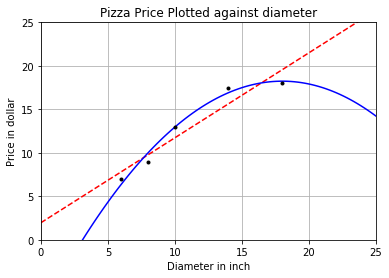

In [23]:
xx = np.linspace(0,26,100)
yy = model.predict(xx.reshape(xx.shape[0],1))
plt.plot(xx, yy, 'r--')
xx_quad =  quadratic_featurizer.fit_transform(xx.reshape(xx.shape[0],1))
plt.plot(xx, quadratic_regressor.predict(xx_quad), 'b-')
plt.plot(X, y, 'k.')
plt.title('Pizza Price Plotted against diameter')
plt.xlabel('Diameter in inch')
plt.ylabel('Price in dollar')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

While *quadratic* and *cubic* regression models are the most common, we can add polynomials of any degree.

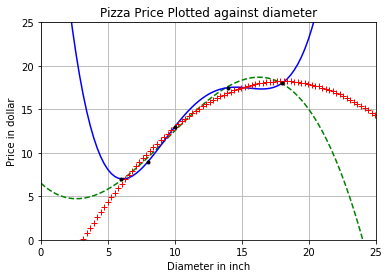

In [24]:
cubic_featurizer = PolynomialFeatures(degree = 3)
biquadratic_featurizer = PolynomialFeatures(degree = 4)
X_train_cubic = cubic_featurizer.fit_transform(X_train)
X_train_biquadratic = biquadratic_featurizer.fit_transform(X_train)
xx_cubic =  cubic_featurizer.fit_transform(xx.reshape(xx.shape[0],1))
xx_biquad =  biquadratic_featurizer.fit_transform(xx.reshape(xx.shape[0],1))
cubic_regressor = LinearRegression()
biquadratic_regressor = LinearRegression()
cubic_regressor.fit(X_train_cubic, y_train)
biquadratic_regressor.fit(X_train_biquadratic, y_train)
plt.plot(xx, cubic_regressor.predict(xx_cubic), 'g--')
plt.plot(xx, biquadratic_regressor.predict(xx_biquad), 'b-')
plt.plot(xx, quadratic_regressor.predict(xx_quad), 'r+')
plt.plot(X, y, 'k.')
plt.title('Pizza Price Plotted against diameter')
plt.xlabel('Diameter in inch')
plt.ylabel('Price in dollar')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

But having a very **high order curve leads to overfitting of data**.
Hence the accuracy of the model will go down

### Boston Dataset

In [25]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

data = load_boston()
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [26]:
#normalizing data
X_scalar = StandardScaler()
y_scalar = StandardScaler()
X_train = X_scalar.fit_transform(X_train)
X_test = X_scalar.transform(X_test)
y_train = y_scalar.fit_transform(y_train.reshape(-1,1))
y_test = y_scalar.transform(y_test.reshape(-1,1))

In [27]:
score = cross_val_score(model, X_train, y_train, cv=5)
print "Accuracy: %.2f +/- %.2f" %(score.mean(), score.std())
model.fit(X_train, y_train)
print model.score(X_test, y_test)

Accuracy: 0.68 +/- 0.05
0.757611184338


### SGD regressor

In [28]:
regressor = SGDRegressor(loss='squared_loss', max_iter=1000)
score = cross_val_score(regressor, X_train, y_train, cv=5)
print "Accuracy: %.2f +/- %.2f" %(score.mean(), score.std())
regressor.fit(X_train, y_train)
print regressor.score(X_train, y_train)

/home/prakhar/Desktop/scikit/venv/local/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.68 +/- 0.05
0.730371237578


## Important links for references